<a href="https://www.kaggle.com/code/sudi7513/prediction-using-neural-networks?scriptVersionId=107494834" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/working/__notebook_source__.ipynb


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [4]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [5]:
## looking at the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Observations 1-
1. columns: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
2. Name columns has long names with brackets, can contain spelling errors and multiple names with differnt spelling, can be mistake in writing or technical errors on purpose to accomodate multiple family members
3. Ticket is alphanumeric with inconsistent pattern

In [6]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


### Observation-2
1. Categorical variables: Name, Sex, Ticket, Cabin, Embarked
2. Train null values present in Age, Cabin, Embarked
3. Test null values present in Age,Fare,Cabin

In [7]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Observation-3
1. PassengerId and Names are all unique values
2. As expected there are 2 classes for Survived ans Sex, 3 classes for Embarked and Pclass


In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
test_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### Observation-4
1. Male are 64% of the population.
2. The cabin B96 B98 was most used by exactly 4 times
3. The ticket 347082 is held by 7 people at most
4. 644 travellors boarded from Southampton

In [10]:
## 4 objects or 4 categorical variables
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Visualizations

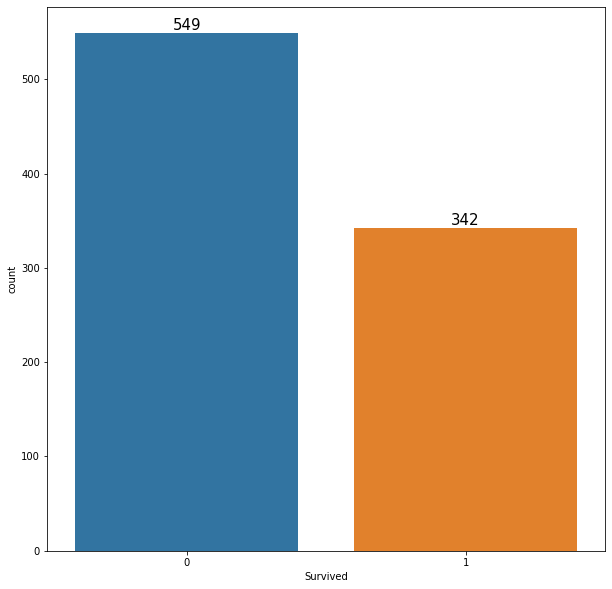

In [11]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=train_data,x='Survived')
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

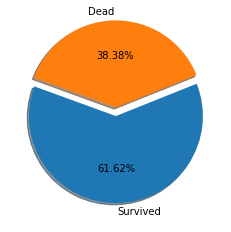

In [12]:
plt.pie(labels=['Survived','Dead'],x=list(train_data.Survived.value_counts()),explode=[0,0.1],startangle=160,autopct="%0.2f%%",shadow=True)
plt.show()

### Observation-5
1. 342 people survived and 549 died.
2. That is 61.2% survived and 38.38% died.

In [13]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

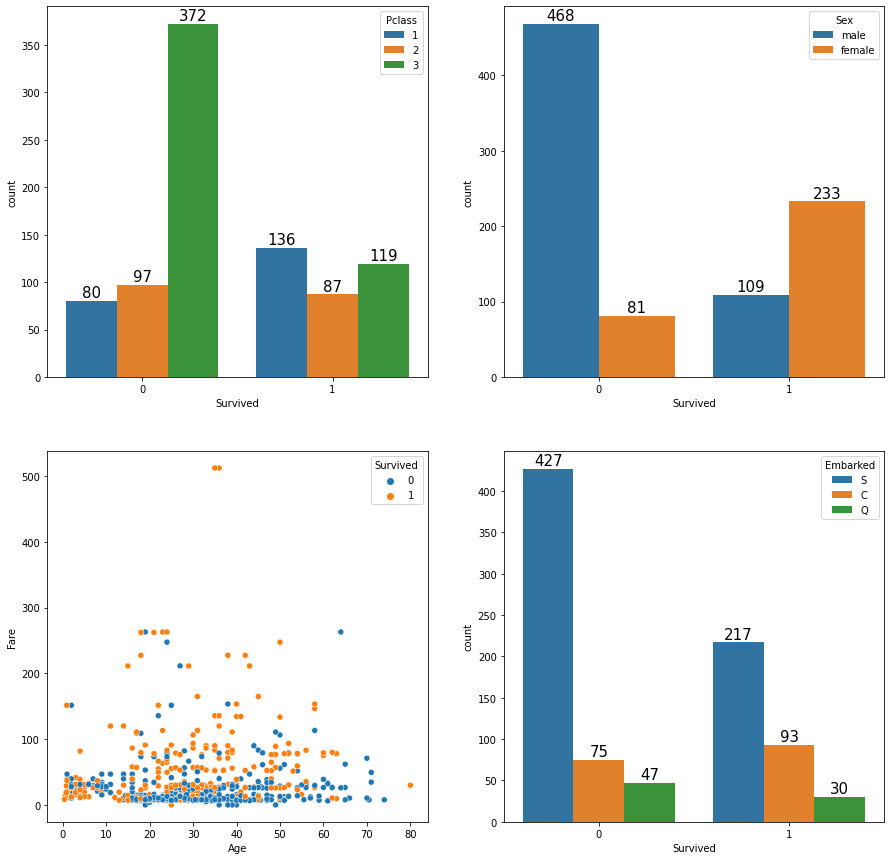

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.countplot(x='Survived',data=train_data,hue='Pclass',ax=axes[0,0])
for bar in axes[0,0].patches:
    axes[0,0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
sns.countplot(x='Survived',data=train_data,hue='Sex',ax=axes[0,1])
for bar in axes[0,1].patches:
    axes[0,1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
sns.scatterplot(data=train_data,x='Age',y='Fare',hue='Survived',ax=axes[1,0])
sns.countplot(x='Survived',data=train_data,hue='Embarked',ax=axes[1,1])
for bar in axes[1,1].patches:
    axes[1,1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [15]:
print('Pclass distribution')
print(train_data['Pclass'].value_counts())
print('\nSex distribution')
print(train_data['Sex'].value_counts())
print('\nEmbarked distribution')
print(train_data['Embarked'].value_counts())

Pclass distribution
3    491
1    216
2    184
Name: Pclass, dtype: int64

Sex distribution
male      577
female    314
Name: Sex, dtype: int64

Embarked distribution
S    644
C    168
Q     77
Name: Embarked, dtype: int64


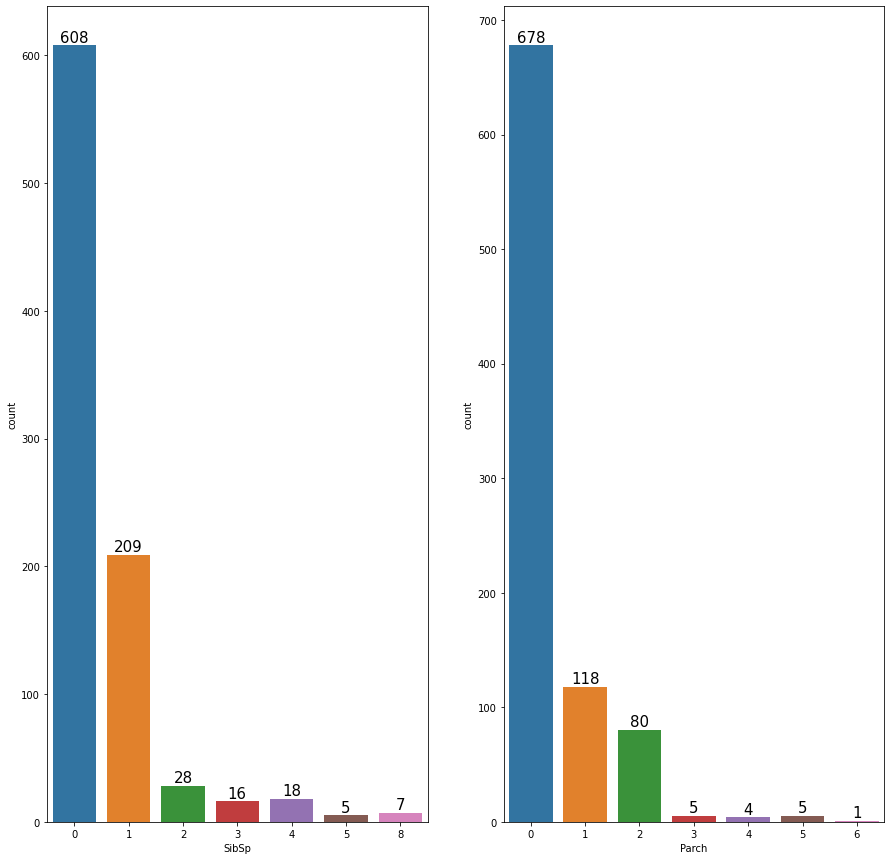

In [16]:
fig, axes = plt.subplots(1,2, figsize=(15, 15))
sns.countplot(x='SibSp',data=train_data,ax=axes[0])
for bar in axes[0].patches:
    axes[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
sns.countplot(x='Parch',data=train_data,ax=axes[1])
for bar in axes[1].patches:
    axes[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

### Observation-6
1. Passengers from 3rd class had the lowest possibility to survive. Although there were maximum passengers from 3rd class. The correlation between class and survival needs to be calculated.
2. More females survived than males given the fact children and women were saved before men.
3. Passengers of all age groups survived but it leaves scope to determine if these were rich passengers who were saved first.
4. Southampton had the maximum number of passengers and also the maximum number of non-survivors. The correlation is yet to be determined.
5. \>74% passengers travells without spouses or siblings and >80% travelled with parents and children.

In [17]:
## A lot of empty values including more than 50% coming from Cabin being unknown. Cannot remove as we have very less observations. 
## 1. Decide if Cabin number affected the survival of the passenger.
## 2. Check if it can be imputed by some means.

In [18]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Observatioin-7
1. PassengerId, Name, Ticket are not related to survival and can be removed.
2. Cabin has a lot of null values are not enough data points to impute, so will be removed as well.
3. Impute missing values in age.

### Notes taken from another nb for inspo
https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/notebook

Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating.**

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing.**

1. We may want to complete Age feature as it is definitely correlated to survival.
2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

**Correcting.**

1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Creating.**

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.

**Classifying.**

We may also add to our assumptions based on the problem description noted earlier.

1. Women (Sex=female) were more likely to have survived.
2. Children (Age\<?) were more likely to have survived.
3. The upper-class passengers (Pclass=1) were more likely to have survived.


In [19]:
train_df = train_data.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
CrosstabResult=pd.crosstab(index=train_data['Pclass'],columns=train_data['Survived'])
print(CrosstabResult)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [26]:
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', round(ChiSqResult[1],4))
## Pclass and Survived are correlated

The P-Value of the ChiSq Test is: 0.0


In [27]:
CrosstabResult=pd.crosstab(index=train_data['Sex'],columns=train_data['Survived'])
print(CrosstabResult)
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', round(ChiSqResult[1],4))
## Sex and Survived are correlated

Survived    0    1
Sex               
female     81  233
male      468  109
The P-Value of the ChiSq Test is: 0.0


<Figure size 1440x720 with 0 Axes>

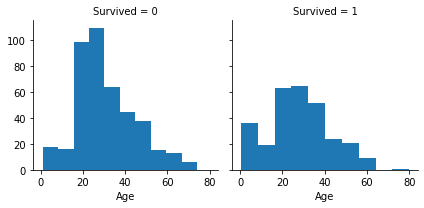

In [34]:
plt.figure(figsize=(20,10))
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=10)

### Observation-8
1. Infants below 10 had a better chance of survival.
2. Teenagers did not have as much chance of survival. Maximum passengers are between 15-40.
3. Older people above 60 did not survive.

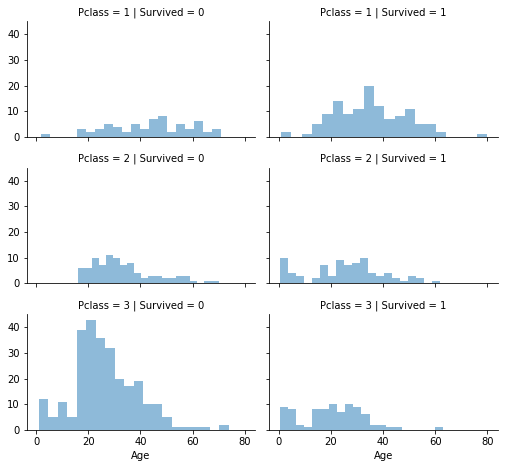

In [36]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Observations-9

1. Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
2. Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
3. Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
4. Pclass varies in terms of Age distribution of passengers.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


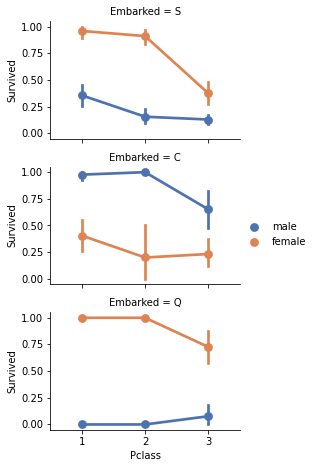

In [42]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Observations-10

1. Female passengers had much better survival rate than males. Confirms classifying (#1).
2. Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
3. Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
4. Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


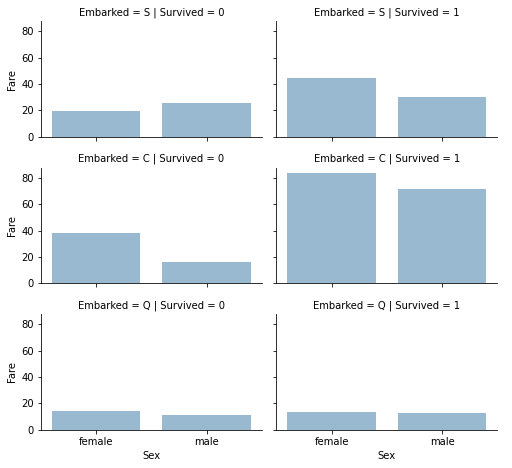

In [44]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### Observations-11

1. Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
2. Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

In [46]:
train_data['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [26]:
## feature engineering of the Name column to extrcat titles and use as a new feature to relate survival of the passenger
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [27]:
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
pd.crosstab(test_data['Title'],test_data['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [28]:
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [29]:
test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')
    
#test_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

In [32]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_data['Title'] = train_data['Title'].map(title_mapping)
#train_data['Title'] = train_data['Title'].fillna(0)
#train_df['Title']=train_data['Title']
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [33]:
test_data['Title'] = test_data['Title'].map(title_mapping)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [36]:
train_data['Sex'] = train_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female':1,'male':0}).astype(int)

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [40]:
train_data.Age.fillna(train_data.Age.median(),inplace=True)
test_data.Age.fillna(test_data.Age.median(),inplace=True)

In [42]:
train_data.Embarked.fillna('S',inplace=True)

In [67]:
train_data['Age'] = train_data['Age'].astype(int)
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [71]:
# for dataset in combine:    
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#     dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,1,"(32.0, 48.0]"


In [44]:
## feature engineering of Parch and SibSp to combine into 1 feature as they are complimentary thus reducing number of variables.
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [73]:
# ## create another feature IsAlone which captures passengers travelling alone and probability of their survival
# train_df['IsAlone'] = 0
# train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1

# train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [77]:
# train_df.drop(columns=['SibSp','Parch'],inplace=True)
# train_df.drop(columns=['AgeBand','IsAlone'],inplace=True)

In [45]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,1


In [79]:
# train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [46]:
train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [49]:
train_df = train_data.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1)
test_df = test_data.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1)

In [50]:
test_df.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize'], dtype='object')

In [51]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'FamilySize'],
      dtype='object')

In [52]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,34.5,7.8292,2,1,1
1,3,1,47.0,7.0000,0,3,2
2,2,0,62.0,9.6875,2,1,1
3,3,0,27.0,8.6625,0,1,1
4,3,1,22.0,12.2875,0,3,3


In [53]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        417 non-null    float64
 4   Embarked    418 non-null    int64  
 5   Title       418 non-null    int64  
 6   FamilySize  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [133]:
# test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
# test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
# test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')
# test_df['Title'] = test_df['Title'].map(title_mapping)
# test_df['Title'] = test_df['Title'].fillna(0)

In [134]:
# test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
# test_df.Age = test_df.Age.fillna(test_df.Age.median())

In [141]:
# test_df['Age'] = test_df['Age'].astype(int)

In [74]:
test_df.Fare = test_df.Fare.fillna(test_df.Fare.median())

In [142]:
# test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
# test_df.Embarked = test_df['Embarked'].fillna('S')
# test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [146]:
# test_df.drop(columns='Name',axis=1,inplace=True)
# test_df.drop(columns=['SibSp','Parch'],axis=1,inplace=True)

In [75]:
## model fitting
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [76]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

98.09

In [77]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
support_algo = clf.fit(X_train, Y_train) 
Y_pred = clf.predict(X_test)
print(round(clf.score(X_train,Y_train)*100,2))

80.02


In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,weights='distance')
knn_algo = knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
print(round(knn.score(X_train,Y_train)*100,2))


98.2


In [106]:
import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential

from keras.layers import Dense
# define the keras model

model = Sequential()

model.add(Dense(12, input_dim=7, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(2, activation='softmax'))

# compile the keras model

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=150, batch_size=10)



#print(round(model.score(X_train,Y_train)*100,2))

Epoch 1/150
90/90 [==============================] - 1s 2ms/step - loss: 0.6773 - accuracy: 0.6397
Epoch 2/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.6880
Epoch 3/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.6857
Epoch 4/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.6902
Epoch 5/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6936
Epoch 6/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.6880
Epoch 7/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.6936
Epoch 8/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.6936
Epoch 9/150
90/90 [==============================] - 0s 3ms/step - loss: 0.5854 - accuracy: 0.6958
Epoch 10/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.6992
Epoch 11/

In [107]:
set(Y_train)

{0, 1}

In [108]:
Y_pred = model.predict(X_test).argmax(axis=1)

In [109]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('/kaggle/working/submission.csv', index=False)

In [154]:
# import os
# new_os = os.chdir(r'/kaggle/working')
# from IPython.display import FileLink 
# link_to_file = FileLink(r'submission.csv')

In [105]:
# link_to_file